In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

%matplotlib notebook

plt.style.use('seaborn-colorblind')
#Golden State Warriors
!pip install lxml
df_Gs=pd.read_html('https://en.wikipedia.org/wiki/List_of_Golden_State_Warriors_seasons')[2][28:]
Golden_state=pd.DataFrame()
Golden_state['Year']=df_Gs['Season']
Golden_state['Losses']=df_Gs['L'].astype(int)
Golden_state['Wins']=df_Gs['W'].astype(int)
Golden_state['Win %_Lions']=Golden_state['Wins']/(Golden_state['Wins']+Golden_state['Losses'])
# Boston Celtics
df_BC=pd.read_html('https://en.wikipedia.org/wiki/List_of_Boston_Celtics_seasons')[1][16:]
Boston_Celtics=pd.DataFrame()
Boston_Celtics['Year']=df_BC['Season']
Boston_Celtics['Losses']=df_BC['Losses'].astype(int)
Boston_Celtics['Wins']=df_BC['Wins'].astype(int)
Boston_Celtics['Win %_Tigers']=Boston_Celtics['Wins']/(Boston_Celtics['Wins']+Boston_Celtics['Losses'])
# Cleveland_Cavaliers
df_CC=pd.read_html('https://en.wikipedia.org/wiki/List_of_Cleveland_Cavaliers_seasons')[1][0:]
Cleveland_Cavaliers=pd.DataFrame()
Cleveland_Cavaliers['Year']=df_CC['Season']
Cleveland_Cavaliers['Losses']=df_CC['Losses'].astype(int)
Cleveland_Cavaliers['Wins']=df_CC['Wins'].astype(int)
Cleveland_Cavaliers['Win %_Tigers']=Cleveland_Cavaliers['Wins']/(Cleveland_Cavaliers['Wins']+Cleveland_Cavaliers['Losses'])
# Los Angeles Lakers
df_Lakers=pd.read_html('https://en.wikipedia.org/wiki/List_of_Los_Angeles_Lakers_seasons')[2][16:]
Los_Angeles_Lakers=pd.DataFrame()
Los_Angeles_Lakers['Year']=df_Lakers['Season']
Los_Angeles_Lakers['Losses']=df_Lakers['Losses'].astype(int)
Los_Angeles_Lakers['Wins']=df_Lakers['Wins'].astype(int)
Los_Angeles_Lakers['Win %_Tigers']=Los_Angeles_Lakers['Wins']/(Los_Angeles_Lakers['Wins']+Los_Angeles_Lakers['Losses'])
#merge
correlation_data=pd.merge(Golden_state.drop(['Wins','Losses'], axis=1),Boston_Celtics.drop(['Wins','Losses'], axis=1),on='Year')
correlation_data=pd.merge(correlation_data,Cleveland_Cavaliers.drop(['Wins','Losses'], axis=1),on='Year')
correlation_data=pd.merge(correlation_data,Los_Angeles_Lakers.drop(['Wins','Losses'], axis=1),on='Year')


<IPython.core.display.Javascript object>


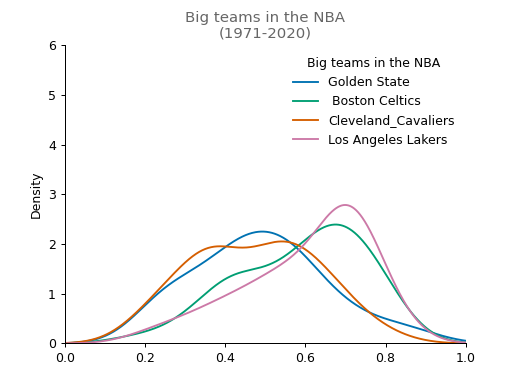

In [4]:
%matplotlib notebook
# Draw KDE
kde=correlation_data.plot.kde()
[kde.spines[loc].set_visible(False) for loc in ['top', 'right']]
kde.axis([0,1,0,6])
kde.set_title('Big teams in the NBA\n(1971-2020)',alpha=0.6)
kde.legend(['Golden State',' Boston Celtics','Cleveland_Cavaliers','Los Angeles Lakers'],loc = 'best',frameon=False, title='Big teams in the NBA', fontsize=10)